In [1]:
#libraries loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat #for loading .mat dataset
import seaborn as sns

In [2]:
#loading dataset
data = loadmat('mnist-original.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [3]:
x = data['data'].T
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
y = data['label'].flatten()
y

array([0., 0., 0., ..., 9., 9., 9.])

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [8]:
df = pd.DataFrame(np.c_[x,y])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df[784].value_counts()

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: 784, dtype: int64

In [11]:
df[78].value_counts() #identifing the predicted cloumn

0.0      69849
255.0        9
15.0         4
36.0         4
253.0        4
         ...  
51.0         1
190.0        1
183.0        1
150.0        1
146.0        1
Name: 78, Length: 102, dtype: int64

In [12]:
#spliting the Dataset into Train and Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x, y, random_state = 0, test_size = 0.25)

In [13]:
x_train.shape,y_test.shape,y_train.shape,y_test.shape

((52500, 784), (17500,), (52500,), (17500,))

# visualize

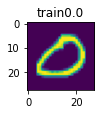

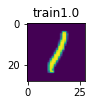

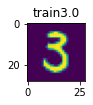

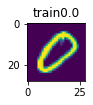

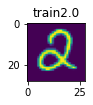

In [14]:
plt.figure(figsize=(7,7))
for indices, (image,label) in enumerate(zip(x_train[:5], y_train[:5])):
    plt.subplot(1,5, indices +1)
    plt.imshow(np.reshape(image,(28,28)))
    plt.title('train' + str(label))
    plt.show()
               

In [15]:
#making model using sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\97798\anaconda\envs\Deep Learning\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
#predicting the class of x_test dataset
pred = model.predict(x_test)

In [17]:
y_test[:5]

array([1., 9., 2., 2., 7.])

In [18]:
pred[:5]

array([1., 9., 2., 2., 7.])

Scores

In [19]:
score = model.score(x_test,y_test)
score

0.9178285714285714

<AxesSubplot:>

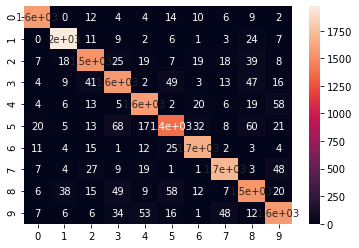

In [20]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True,)

Misclassified sample dataset

In [21]:
index = 0
m = []
for label, predict in zip(y_test, pred):
    if label != predict:
        m.append(index)
    index += 1

In [22]:
m[:5]

[16, 19, 20, 55, 65]

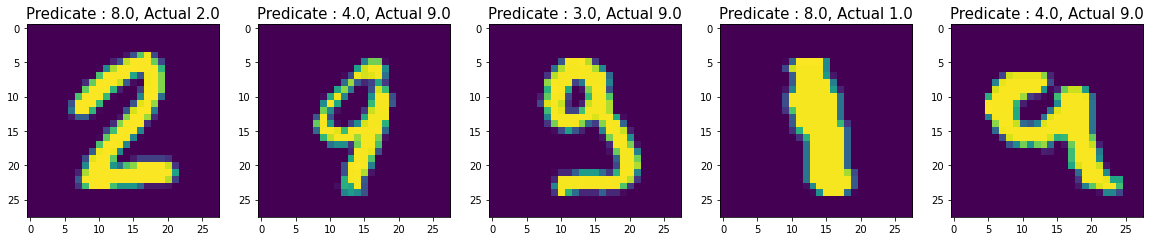

In [23]:
plt.figure(figsize=(20,8))
for i, j in enumerate(m[:5]):
    plt.subplot(1,5,i +1)
    plt.imshow(np.reshape(x_test[j],(28,28)))
    plt.title('Predicate : {}, Actual {}'.format(pred[j],y_test[j]),fontsize = 15)